In [35]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
data = pd.read_csv('car_data.csv', dtype={'Milleage (kms)': float})
data.head()

,Brand,Model,Fuel type,Transmission,Conditon,First Registration Year,Milleage (kms),Engine Power (PS),Price (EUR)
0,Ford,Fiesta,Benzin,Schaltgetriebe,Gebraucht,05/2010,63729.0,82.0,2850.0
1,Nissan,Pixo,Benzin,Schaltgetriebe,Gebraucht,06/2011,65000.0,68.0,2999.0
2,Hyundai,i10,Benzin,Schaltgetriebe,Gebraucht,08/2012,35000.0,69.0,3299.0
3,Renault,Twingo,Benzin,Schaltgetriebe,Gebraucht,11/2011,60211.0,75.0,3990.0
4,Peugeot,107,Benzin,Schaltgetriebe,Gebraucht,06/2010,80000.0,68.0,3990.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    2780 non-null   object 
 1   Model                    2765 non-null   object 
 2   Fuel type                2780 non-null   object 
 3   Transmission             2780 non-null   object 
 4   Conditon                 2780 non-null   object 
 5   First Registration Year  2780 non-null   object 
 6   Milleage (kms)           2780 non-null   float64
 7   Engine Power (PS)        2780 non-null   float64
 8   Price (EUR)              2780 non-null   float64
dtypes: float64(3), object(6)
memory usage: 195.6+ KB


In [38]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 2779
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    2765 non-null   object 
 1   Model                    2765 non-null   object 
 2   Fuel type                2765 non-null   object 
 3   Transmission             2765 non-null   object 
 4   Conditon                 2765 non-null   object 
 5   First Registration Year  2765 non-null   object 
 6   Milleage (kms)           2765 non-null   float64
 7   Engine Power (PS)        2765 non-null   float64
 8   Price (EUR)              2765 non-null   float64
dtypes: float64(3), object(6)
memory usage: 216.0+ KB


In [39]:
data.describe()

,Milleage (kms),Engine Power (PS),Price (EUR)
count,2765.000000,2765.000000,2765.000000
mean,48916.047016,127.463291,14058.759855
std,29765.188422,83.693305,11768.228151
min,0.000000,8.000000,2850.000000
25%,24423.000000,82.000000,7898.000000
50%,50000.000000,105.000000,10490.000000
75%,73604.000000,136.000000,13950.000000
max,100000.000000,717.000000,78899.000000


In [40]:
years =[]

for el in data['First Registration Year']:
    el_list = el.split("/")
    years.append(el_list[1])
    
data['Production_Year'] = years

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 2779
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    2765 non-null   object 
 1   Model                    2765 non-null   object 
 2   Fuel type                2765 non-null   object 
 3   Transmission             2765 non-null   object 
 4   Conditon                 2765 non-null   object 
 5   First Registration Year  2765 non-null   object 
 6   Milleage (kms)           2765 non-null   float64
 7   Engine Power (PS)        2765 non-null   float64
 8   Price (EUR)              2765 non-null   float64
 9   Production_Year          2765 non-null   object 
dtypes: float64(3), object(7)
memory usage: 237.6+ KB


In [42]:
data['Brand'] = data['Brand'].astype('category')
data['Model'] = data['Model'].astype('category')
data['Conditon'] = data['Conditon'].astype('category')
data['Fuel type'] = data['Fuel type'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
#data['First Registration Year'] = pd.to_datetime(data['First Registration Year'])
#data['Production_Year'] = pd.to_datetime(data['Production_Year'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 2779
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Brand                    2765 non-null   category
 1   Model                    2765 non-null   category
 2   Fuel type                2765 non-null   category
 3   Transmission             2765 non-null   category
 4   Conditon                 2765 non-null   category
 5   First Registration Year  2765 non-null   object  
 6   Milleage (kms)           2765 non-null   float64 
 7   Engine Power (PS)        2765 non-null   float64 
 8   Price (EUR)              2765 non-null   float64 
 9   Production_Year          2765 non-null   object  
dtypes: category(5), float64(3), object(2)
memory usage: 160.0+ KB


In [44]:
#sns.pairplot(data)

In [45]:
pipe_lr = make_pipeline(OneHotEncoder(handle_unknown='ignore'), LinearRegression())

In [46]:
X = data.drop('Price (EUR)', axis = 1)
y = data['Price (EUR)']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [48]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('linearregression', LinearRegression())])

In [49]:
pred_lr = pipe_lr.predict(X_test)

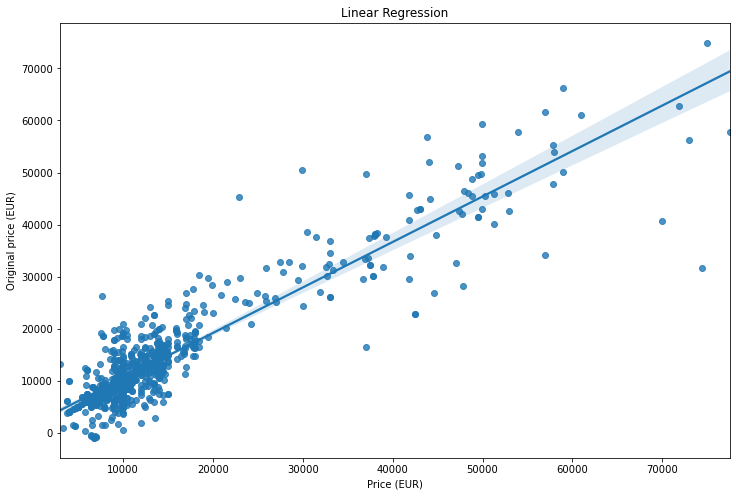

In [50]:
fig = plt.figure(figsize=[12,8])
plt.title("Linear Regression")
plt.xlabel("Predicted price (EUR)")
plt.ylabel("Original price (EUR)")
sns.regplot(y_test, pred_lr)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('Score:', metrics.r2_score(y_test, pred_lr)*100 )

MAE: 2433.30244576061
MSE: 19582294.51784157
RMSE: 4425.188642062796
Score: 84.39842341377476


In [52]:
pipe_ls = make_pipeline(OneHotEncoder(handle_unknown='ignore'), Lasso(alpha=0.1))

In [53]:
pipe_ls.fit(X_train, y_train)

c:\users\laman\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:510: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256621033.999321, tolerance: 26815624.615420096
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('lasso', Lasso(alpha=0.1))])

In [54]:
pred_ls = pipe_ls.predict(X_test)

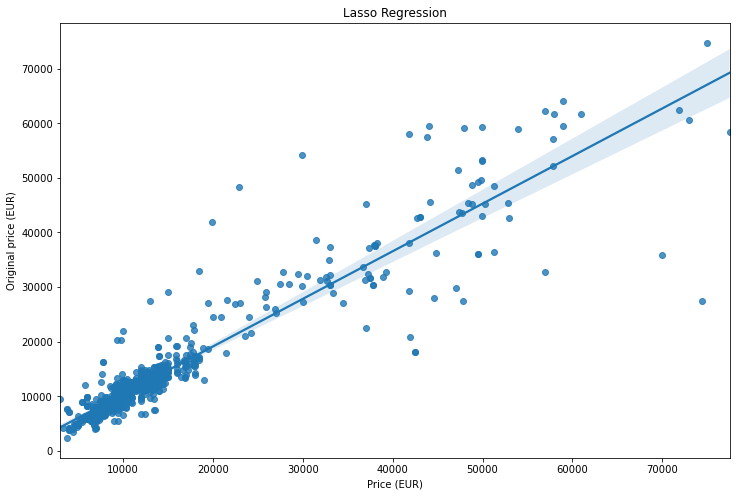

In [55]:
fig = plt.figure(figsize=[12,8])
plt.title("Lasso Regression")
plt.xlabel("Predicted price (EUR)")
plt.ylabel("Original price (EUR)")
sns.regplot(y_test, pred_ls)

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ls)))
print('Score:', metrics.r2_score(y_test, pred_ls)*100 )

MAE: 1757.9103032941425
MSE: 16466056.346133169
RMSE: 4057.8388763149737
Score: 86.88118805877234


In [57]:
pipe_rm = make_pipeline(OneHotEncoder(handle_unknown='ignore') ,RandomForestRegressor(n_estimators = 150))
pipe_rm.fit(X_train, y_train)
pred_rm=pipe_rm.predict(X_test)

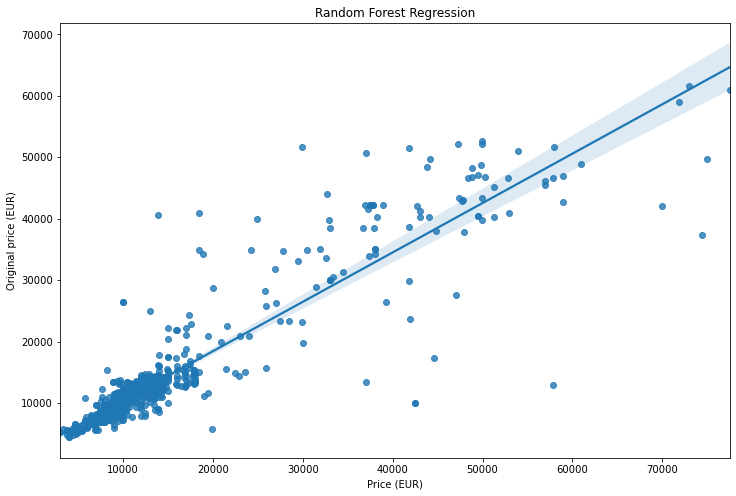

In [58]:
fig = plt.figure(figsize=[12,8])
plt.title("Random Forest Regression")
plt.xlabel("Predicted price (EUR)")
plt.ylabel("Original price (EUR)")
sns.regplot(y_test, pred_rm)

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rm))
print('MSE:', metrics.mean_squared_error(y_test, pred_rm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rm)))
print('Score:', metrics.r2_score(y_test, pred_rm)*100 )

MAE: 2026.2852088001614
MSE: 20561198.08599093
RMSE: 4534.445730846377
Score: 83.61851281774646


In [60]:
pipe_ls.predict([["Ford", 'Fiesta', 'Benzin', 'Schaltgetriebe', 'Gebraucht', 11/2011, 60211, 75, 2011]])

array([9554.37867779])